In [ ]:
# Write the CSV data directly in Colab
csv_data = """CustomerID,Age,Job,Marital,Education,Balance,Loan
101,35,admin,married,secondary,1500,yes
102,42,technician,single,tertiary,2400,no
103,29,entrepreneur,married,primary,500,yes
104,51,blue-collar,divorced,secondary,800,no
105,34,services,single,tertiary,1200,yes
106,47,management,married,tertiary,3000,no
107,26,student,single,secondary,100,no
108,39,self-employed,married,tertiary,2500,no
109,31,unemployed,single,primary,300,yes
110,45,technician,married,secondary,1800,no"""

# Save the data to a CSV file
with open("bank.csv", "w") as file:
    file.write(csv_data)

print("bank.csv created!")


bank.csv created!


3.1 Warming Up Exercises - Basic Inspection and Exploration:
Problem 1 - Data Read, Write and Inspect:

1. Load the provided dataset and import in pandas DataFrame.

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("bank.csv")

# Display the first few rows of the dataset
df.head()



,CustomerID,Age,Job,Marital,Education,Balance,Loan
0,101,35,admin,married,secondary,1500,yes
1,102,42,technician,single,tertiary,2400,no
2,103,29,entrepreneur,married,primary,500,yes
3,104,51,blue-collar,divorced,secondary,800,no
4,105,34,services,single,tertiary,1200,yes


2. Check info of the DataFrame and identify following:


(a) columns with dtypes=object


In [ ]:
# Get info of the DataFrame
df.info()

# Identify columns with dtype=object
object_columns = df.select_dtypes(include=['object']).columns
print("Columns with dtype=object:", object_columns)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  10 non-null     int64 
 1   Age         10 non-null     int64 
 2   Job         10 non-null     object
 3   Marital     10 non-null     object
 4   Education   10 non-null     object
 5   Balance     10 non-null     int64 
 6   Loan        10 non-null     object
dtypes: int64(3), object(4)
memory usage: 688.0+ bytes
Columns with dtype=object: Index(['Job', 'Marital', 'Education', 'Loan'], dtype='object')


(b) unique values of those columns.

In [ ]:
# Display unique values for each object column
for col in object_columns:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())
    print("-" * 50)


Unique values in column 'Job':
['admin' 'technician' 'entrepreneur' 'blue-collar' 'services' 'management'
 'student' 'self-employed' 'unemployed']
--------------------------------------------------
Unique values in column 'Marital':
['married' 'single' 'divorced']
--------------------------------------------------
Unique values in column 'Education':
['secondary' 'tertiary' 'primary']
--------------------------------------------------
Unique values in column 'Loan':
['yes' 'no']
--------------------------------------------------


(c) check for the total number of null values in each column.

In [ ]:
# Check null values in each column
null_counts = df.isnull().sum()
print("Total null values in each column:")
print(null_counts)


Total null values in each column:
CustomerID    0
Age           0
Job           0
Marital       0
Education     0
Balance       0
Loan          0
dtype: int64


3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”

In [ ]:
# Drop columns with dtype=object
df_numeric = df.drop(columns=object_columns)

# Save the new DataFrame to a CSV file
df_numeric.to_csv("banknumericdata.csv", index=False)

print("Numeric data saved to 'banknumericdata.csv'")


Numeric data saved to 'banknumericdata.csv'


4. Read ”banknumericdata.csv” and Find the summary statistics.

In [ ]:
# Read the numeric data from the saved CSV
df_numeric = pd.read_csv("banknumericdata.csv")

# Display summary statistics
print("Summary statistics:")
print(df_numeric.describe())


Summary statistics:
       CustomerID        Age      Balance
count    10.00000  10.000000    10.000000
mean    105.50000  37.900000  1410.000000
std       3.02765   8.265726  1002.718527
min     101.00000  26.000000   100.000000
25%     103.25000  31.750000   575.000000
50%     105.50000  37.000000  1350.000000
75%     107.75000  44.250000  2250.000000
max     110.00000  51.000000  3000.000000


Problem 2 - Data Imputations:
Complete all the following Task:


• Dataset for the Task: "medical_student.csv"
1. Load the provided dataset and import in pandas DataFrame.

In [ ]:
# Write the CSV data directly in Colab
medical_data = """StudentID,Name,Age,Gender,Grade,Specialization
101,John,22,Male,A,Cardiology
102,Sarah,23,Female,B,Neurology
103,Mike,,Male,C,Pediatrics
104,Linda,21,Female,A,Neurology"""

# Save the data to a CSV file
with open("medical_student.csv", "w") as file:
    file.write(medical_data)

print("medical_student.csv created!")


medical_student.csv created!


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("medical_student.csv")

# Display the first few rows
df.head()


,StudentID,Name,Age,Gender,Grade,Specialization
0,101,John,22.0,Male,A,Cardiology
1,102,Sarah,23.0,Female,B,Neurology
2,103,Mike,NaN,Male,C,Pediatrics
3,104,Linda,21.0,Female,A,Neurology


2. Check info of the DataFrame and identify column with missing (null) values.

In [ ]:
# Get info of the DataFrame
df.info()

# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   StudentID       4 non-null      int64  
 1   Name            4 non-null      object 
 2   Age             3 non-null      float64
 3   Gender          4 non-null      object 
 4   Grade           4 non-null      object 
 5   Specialization  4 non-null      object 
dtypes: float64(1), int64(1), object(4)
memory usage: 320.0+ bytes
Missing values in each column:
StudentID         0
Name              0
Age               1
Gender            0
Grade             0
Specialization    0
dtype: int64


3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.

In [ ]:
# Example: Fill numeric columns with mean (e.g., 'Age' column)
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Example: Fill categorical columns with mode (e.g., 'Gender' column)
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

# Example: Fill missing specialization with mode (since it's categorical)
df['Specialization'] = df['Specialization'].fillna(df['Specialization'].mode()[0])

# Verify missing values are handled
print(df.isnull().sum())


StudentID         0
Name              0
Age               0
Gender            0
Grade             0
Specialization    0
dtype: int64


4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [ ]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# If duplicates are found, drop them
if duplicate_count > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed. Remaining rows: {len(df)}")
else:
    print("No duplicates found in the dataset.")


Number of duplicate rows: 0
No duplicates found in the dataset.


3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:


Dataset Used: "titanic.csv"




Problem - 1:
Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?

In [ ]:
# Write Titanic dataset with 'Embarked' column to a CSV file
titanic_data = """PassengerId,Name,Pclass,Sex,Age,Fare,Survived,Embarked
1,Arjabi,1,Female,22,7.25,0,S
2,Shiwani,1,Female,38,71.2833,1,C
3,Namuna,1,Female,26,7.925,1,Q
4,Sajani,1,Female,35,53.1,1,S
5,Ryan,1,Male,35,8.05,0,S
6,Joshua,1,Male,22,7.25,0,S
7,Johnson,1,Male,26,7.925,1,Q
"""
with open("titanic.csv", "w") as file:
    file.write(titanic_data)


In [ ]:
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv("titanic.csv")

# Subset the dataset for specific columns and filter for first-class passengers (Pclass == 1)
subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
first_class_df = subset_df[subset_df['Pclass'] == 1]

# Calculate the mean, median, max, and min for the 'Fare' column
mean_fare = first_class_df['Fare'].mean()
median_fare = first_class_df['Fare'].median()
max_fare = first_class_df['Fare'].max()
min_fare = first_class_df['Fare'].min()

# Display the calculated statistics
print("Mean Fare:", mean_fare)
print("Median Fare:", median_fare)
print("Max Fare:", max_fare)
print("Min Fare:", min_fare)


Mean Fare: 23.254757142857148
Median Fare: 7.925
Max Fare: 71.2833
Min Fare: 7.25


Problem - 2:


How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.

In [ ]:
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv("titanic.csv")

# Subset the dataset for specific columns and filter for first-class passengers (Pclass == 1)
subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
first_class_df = subset_df[subset_df['Pclass'] == 1]

# Check the number of null values in the 'Age' column
null_age_count = first_class_df['Age'].isnull().sum()
print(f"Number of null values in 'Age' column: {null_age_count}")

# Drop rows with null values in the 'Age' column
first_class_df_cleaned = first_class_df.dropna(subset=['Age'])

# Verify that the rows with null 'Age' have been dropped
null_age_count_after_drop = first_class_df_cleaned['Age'].isnull().sum()
print(f"Number of null values in 'Age' column after dropping: {null_age_count_after_drop}")

# Display the cleaned DataFrame
first_class_df_cleaned.head()


Number of null values in 'Age' column: 0
Number of null values in 'Age' column after dropping: 0


,Name,Pclass,Sex,Age,Fare,Survived
0,Arjabi,1,Female,22,7.2500,0
1,Shiwani,1,Female,38,71.2833,1
2,Namuna,1,Female,26,7.9250,1
3,Sajani,1,Female,35,53.1000,1
4,Ryan,1,Male,35,8.0500,0


Problem - 3:

The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka-
tion:

• ’C’ for Cherbourg
• ’Q’ for Queenstown
• ’S’ for Southampton
Task:
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).
2. Add these new columns to the original DataFrame.
3. Drop the original ’Embarked’ column.
4. Print the first few rows of the modified DataFrame to verify the changes.

In [ ]:
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv("titanic.csv")

# Verify column names
print(df.columns)

# Apply one-hot encoding to the 'Embarked' column, add the new columns, and drop the original column
df = pd.concat([df, pd.get_dummies(df['Embarked'], prefix='Embarked')], axis=1).drop('Embarked', axis=1)

# Print the first few rows of the modified DataFrame
print(df.head())


Index(['PassengerId', 'Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived',
       'Embarked'],
      dtype='object')
   PassengerId     Name  Pclass     Sex  Age     Fare  Survived  Embarked_C  \
0            1   Arjabi       1  Female   22   7.2500         0       False   
1            2  Shiwani       1  Female   38  71.2833         1        True   
2            3   Namuna       1  Female   26   7.9250         1       False   
3            4   Sajani       1  Female   35  53.1000         1       False   
4            5     Ryan       1    Male   35   8.0500         0       False   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2        True       False  
3       False        True  
4       False        True  


Problem - 4:

Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
ization to show how the survival distributions vary by gender.

Mean survival rates by gender:
Sex
Female    0.750000
Male      0.333333
Name: Survived, dtype: float64


<ipython-input-26-b51b1ea73fa1>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, ci=None, palette='pastel')
<ipython-input-26-b51b1ea73fa1>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, ci=None, palette='pastel')


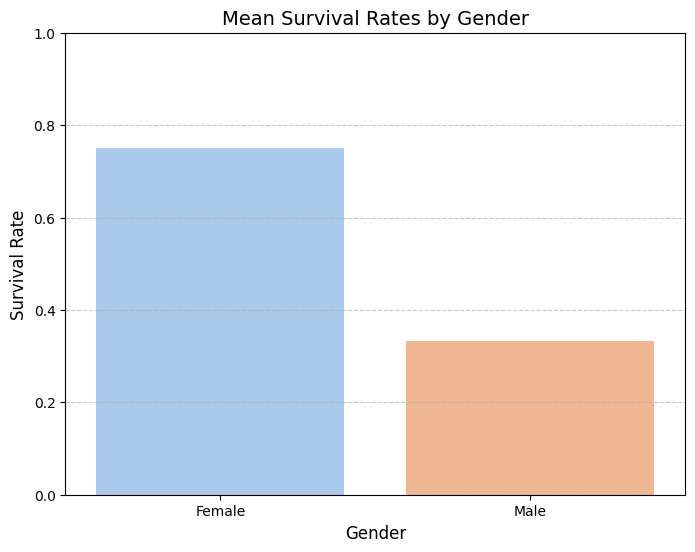

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = pd.read_csv("titanic.csv")

# Calculate mean survival rates for different groups in the 'Sex' column
mean_survival_by_sex = df.groupby('Sex')['Survived'].mean()
print("Mean survival rates by gender:")
print(mean_survival_by_sex)

# Visualization: Survival distributions by gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=df, ci=None, palette='pastel')

# Customize the plot
plt.title('Mean Survival Rates by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.ylim(0, 1)  # Survival rates range from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


Problem - 5:

Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

<ipython-input-27-1d312636b38d>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Embarked', y='Survived', hue='Sex', data=df, ci=None, palette='pastel')


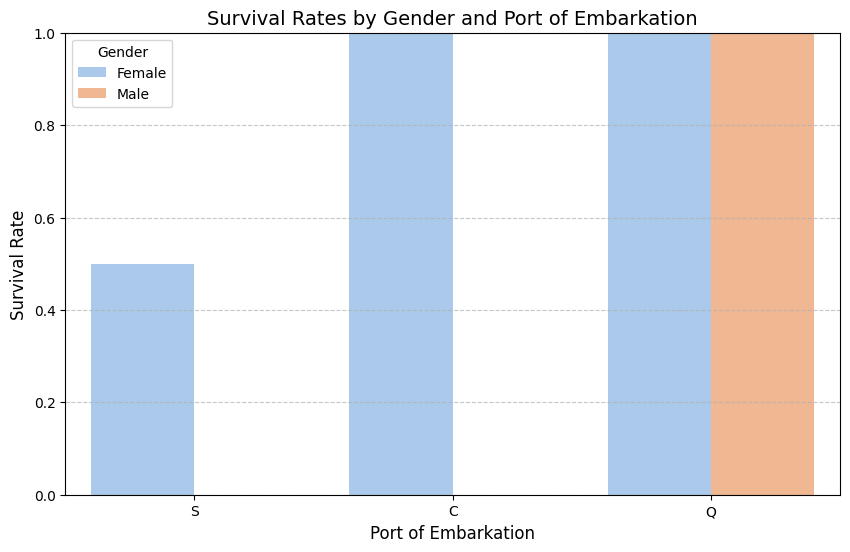

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = pd.read_csv("titanic.csv")

# Ensure the 'Embarked' column is clean and meaningful
df = df.dropna(subset=['Embarked', 'Sex', 'Survived'])  # Drop rows with missing data in key columns

# Visualization: Survival rates by gender and port of embarkation
plt.figure(figsize=(10, 6))
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=df, ci=None, palette='pastel')

# Customize the plot
plt.title('Survival Rates by Gender and Port of Embarkation', fontsize=14)
plt.xlabel('Port of Embarkation', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.ylim(0, 1)  # Survival rates range from 0 to 1
plt.legend(title='Gender', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


Problem - 6{Optional}:
Show how the survival rates (’Survived’) vary by age group and passenger class (’Pclass’). Break up the
’Age’ column into five quantiles in your DataFrame, and then compare the means of ’Survived’ by class
and age group. Draw a visualization using a any plotting library to represent this graphically.

Mean survival rates by AgeGroup and Pclass:
Pclass      1
AgeGroup     
Q1        0.0
Q2        1.0
Q3        NaN
Q4        0.5
Q5        1.0


<ipython-input-28-80dd9c764e3e>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = df.groupby(['AgeGroup', 'Pclass'])['Survived'].mean().unstack()


<Figure size 1200x800 with 0 Axes>

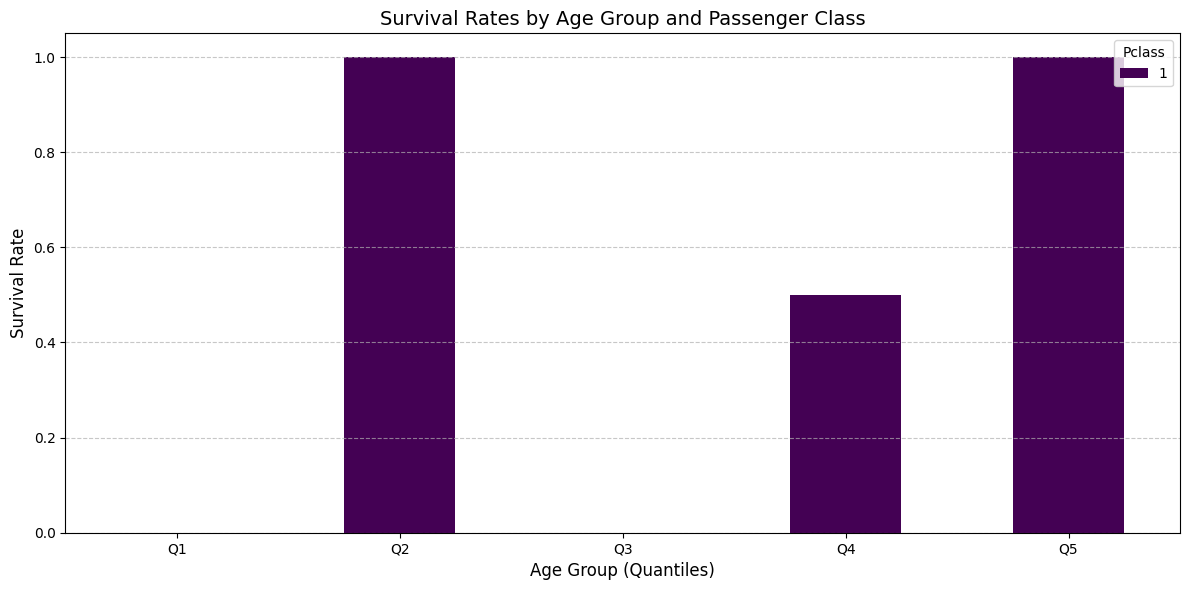

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = pd.read_csv("titanic.csv")

# Drop rows with missing values in 'Age' and 'Survived'
df = df.dropna(subset=['Age', 'Survived'])

# Create age groups (quantiles) and add them as a new column
df['AgeGroup'] = pd.qcut(df['Age'], q=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])

# Calculate mean survival rates by AgeGroup and Pclass
survival_rates = df.groupby(['AgeGroup', 'Pclass'])['Survived'].mean().unstack()
print("Mean survival rates by AgeGroup and Pclass:")
print(survival_rates)

# Visualization: Survival rates by AgeGroup and Pclass
plt.figure(figsize=(12, 8))
survival_rates.plot(kind='bar', figsize=(12, 6), colormap='viridis')

# Customize the plot
plt.title('Survival Rates by Age Group and Passenger Class', fontsize=14)
plt.xlabel('Age Group (Quantiles)', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Pclass', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
